In [2]:
import os
import pylab as pl
import geopandas as gp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# SCOPE: creating a model predicting building age (>68 or <=68 years, i.e. built before or after 1950) based on PLUTO features in Manhattan

## get pluto data

In [3]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")


In [4]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDist', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'LtdHeight', 'AllZoning1', 'AllZoning2',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'YearBuilt', 'BuiltCode', 'YearAlter1',
       'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR',
       'FacilFAR', 'BoroCode', 'BBL', 'CondoNo', 'T

In [5]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1545,52,108,138,4000,02,5,10028,E022,...,10515,None,0.000000e+00,None,1,16v1,0,260.428942,2867.154706,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,MN,723,7501,104,93,6000,02,3,10001,E003,...,10302,None,1.007230e+09,11/30/2006,1,16v1,7,417.764545,10907.639931,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,MN,1680,48,111,170,5000,04,8,10029,E091,...,10605,None,0.000000e+00,None,1,16v1,0,256.893308,2665.033424,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,MN,1385,32,108,130,2003,02,4,10021,E039,...,10508,None,0.000000e+00,None,1,16v1,0,505.033271,15302.920916,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,MN,1197,27,107,169,5000,03,6,10024,E074,...,10408,None,0.000000e+00,None,1,16v1,0,295.652483,4374.612455,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [6]:
bsize[['LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal']]
bsize[['LotFront', 'LotDepth', 'BldgFront', 'BldgDepth',
       'LotType',  'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'BoroCode', 'BBL', 'CondoNo', 'Tract2010', 'XCoord',
       'YCoord']]

,LotFront,LotDepth,BldgFront,BldgDepth,LotType,AssessLand,AssessTot,ExemptLand,ExemptTot,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord
0,27.67,100.00,28.00,82.00,5,468000.0,1435950.0,0.0,0.0,1,1.015450e+09,0,0138,997248,221815
1,98.75,100.00,87.00,100.00,0,539984.0,11879993.0,14160.0,14160.0,1,1.007238e+09,1499,0093,984143,211916
2,25.00,100.92,25.00,89.00,5,140102.0,343271.0,140102.0,343271.0,1,1.016800e+09,0,0170,1000706,227872
3,100.42,150.00,98.00,141.00,3,5040000.0,30591900.0,26660.0,26660.0,1,1.013850e+09,0,0130,993916,219872
4,40.00,102.17,40.00,84.00,5,437850.0,1267200.0,0.0,0.0,1,1.011970e+09,0,0169,992229,224826
5,19.67,74.50,20.00,49.00,5,13544.0,29631.0,0.0,0.0,1,1.002360e+09,0,0041,984868,201324
6,20.00,98.75,20.00,91.00,5,270000.0,1359450.0,0.0,0.0,1,1.008370e+09,0,0084,988316,212594
7,30.00,99.92,30.00,98.00,3,219150.0,3264750.0,0.0,0.0,1,1.001960e+09,0,0031,983646,201076
8,50.00,150.00,50.00,130.00,5,62100.0,649350.0,0.0,0.0,1,1.022240e+09,0,0291,1004932,254320
9,20.00,102.17,20.00,90.00,5,123430.0,379388.0,0.0,0.0,1,1.011270e+09,0,0161,990793,222976


## extracting relevant features
I am leaving in as many numerical features as I can, removing most categoricals, remoging the Boro core, since I am using only Manhattan, but leaving in some categorical features that I will carelessly treat as numerical in the interest of time: e.g. 'BBL', 'CondoNo', 'Tract2010'

In [7]:
X = bsize[['LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth',
       'LotType',  'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'BBL', 'CondoNo', 'Tract2010', 'XCoord',
       'YCoord',"YearBuilt"]]


BBL when encoded as numerical is a number of order billion. This large number creastes instabilities (and the preprocessing scale function in sklearn complained about it) so I preemptively divide it by 1e9 to make it order unit

In [8]:
X[["BBL"]] = X[["BBL"]] / 1e9

//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


The easiest way to deal with NaN is to remove them. I remove all *rows* that contain NaNs (rows is the default pandas behavior)

In [9]:
X.dropna(inplace=True)

//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


then I check if I have enough data left

In [10]:
X.shape

(42641, 29)

Define the target variable and convert it to numerical

In [11]:
y = X["YearBuilt"] > 1950

In [12]:
y = y.astype(int).values
y

array([0, 0, 0, ..., 1, 0, 0])

and remove it from the feature space (its a column so I have to specify removal along the columns axis: axis=1)

In [13]:
X.drop("YearBuilt", axis=1, inplace=True)

//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# modeling
I will model the building age with a random forest and a Gradient Boosted Tree

## import the machine learning functions fron sklearn

In [14]:
import sklearn
from sklearn import preprocessing

In [15]:
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.ensemble  import GradientBoostingClassifier as gdb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


## preprocessing

standard scaling: treat features as independent of each other and standardize along the columns

In [16]:
X = preprocessing.scale(X)

//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [17]:
X.mean(axis=0)

array([ 2.66613911e-18,  7.99841733e-18, -2.13291129e-17, -1.19976260e-17,
        1.06645564e-17, -7.99841733e-18,  9.33148688e-18, -5.33227822e-18,
       -2.41618857e-18, -6.99861516e-18,  6.73200125e-17, -3.73259475e-17,
        1.19976260e-17,  1.86629738e-17,  2.93275302e-17, -1.19976260e-17,
        3.99920866e-17, -4.59908996e-17,  2.07958850e-16, -6.66534777e-18,
        1.33306955e-17,  1.99960433e-18, -9.99802166e-18, -4.90369636e-15,
       -1.06645564e-17,  6.99861516e-18, -5.22563265e-16, -5.42559309e-16])

In [18]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## modeling with Random Forest

In [19]:
rfc?

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)


# Supervised transformation based on random forests
rf = rfc(max_depth=3, n_estimators=100)
rf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Gradient boosted tree

In [21]:
# Supervised transformation based on gradient boosted trees
gmod = gdb()
gmod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

 model predictions on test sample

In [22]:
y_pred = gmod.predict(X_test)
fpr_gdb, tpr_gdb, _ = roc_curve(y_test, y_pred, drop_intermediate=False)

y_pred_rf = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf, drop_intermediate=False)

# model diagnostics
## confusion matrix

confusion matrix
 [[12161   215]
 [  825   871]]


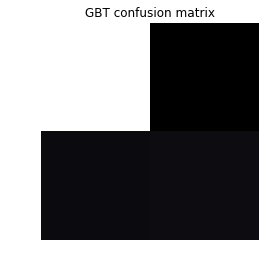

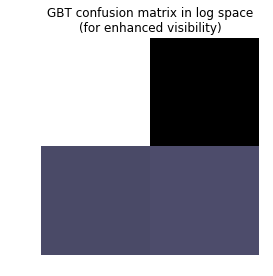

In [23]:
ax = pl.figure().add_subplot(111)
ax.imshow(confusion_matrix(y_test, y_pred), cmap='bone')
ax.set_title("GBT confusion matrix")
ax.axis('off')

ax = pl.figure().add_subplot(111)
ax.imshow(np.log10(confusion_matrix(y_test, y_pred)), cmap='bone')
ax.set_title("GBT confusion matrix in log space\n(for enhanced visibility)")
ax.axis('off');

print("confusion matrix\n", confusion_matrix(y_test, y_pred))

confusion matrix
 [[12288    88]
 [ 1289   407]]


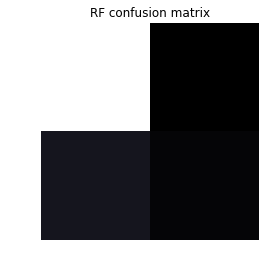

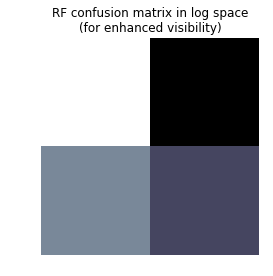

In [24]:
ax = pl.figure().add_subplot(111)
ax.imshow(confusion_matrix(y_test, y_pred_rf), cmap='bone')
ax.set_title("RF confusion matrix")
ax.axis('off')

ax = pl.figure().add_subplot(111)
ax.imshow(np.log10(confusion_matrix(y_test, y_pred_rf)), cmap='bone')
ax.set_title("RF confusion matrix in log space\n(for enhanced visibility)")
ax.axis('off');

print("confusion matrix\n", confusion_matrix(y_test, y_pred_rf))

## ROC curve
the defaul ROC curve has a FP/TP pair for each class pairs: here 2 classes, 1 pair

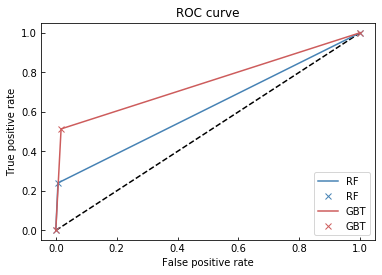

In [25]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, '-', color='SteelBlue', label='RF')
plt.plot(fpr_rf, tpr_rf, 'x', color='SteelBlue', label='RF')
plt.plot(fpr_gdb, tpr_gdb, '-', color='IndianRed',label='GBT')
plt.plot(fpr_gdb, tpr_gdb, 'x', color='IndianRed',label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()


In [27]:
roc_curve(y_test, y_pred_rf)
    

(array([0.        , 0.00711054, 1.        ]),
 array([0.        , 0.23997642, 1.        ]),
 array([2, 1, 0]))

## probabilitic prediction ROC curve
the probabilistic prediction give tp/fp pairs along the entise set of percentages (0-1 in steps of 0.1)

In [30]:
prediction = rfc().fit(X_train,y_train).predict_proba(X_test)
roc_curve(y_test, prediction[:,1])


//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(array([0.00000000e+00, 1.61603103e-04, 1.69683258e-03, 4.44408533e-03,
        9.77698772e-03, 1.82611506e-02, 3.16742081e-02, 5.17129929e-02,
        8.37104072e-02, 1.42372334e-01, 2.82724628e-01, 1.00000000e+00]),
 array([0.        , 0.1196934 , 0.21639151, 0.32370283, 0.41450472,
        0.52181604, 0.61674528, 0.70695755, 0.77889151, 0.85377358,
        0.93042453, 1.        ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

## splitting the sample in 15 sets of test-train pairs I can create multiple ROC and calculate their variance

//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

NameError: name 'tprs_gdb' is not defined

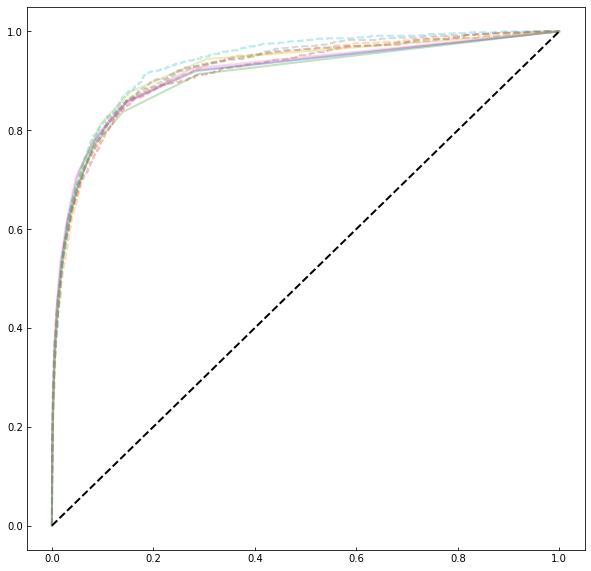

In [36]:
kf = KFold(n_splits=5)
cv = kf.split(X,y)
tprs_GDB = []
aucs_GDB = []
tprs_RF = []
aucs_RF = []
mean_fpr = np.linspace(0,1,100)
i = 1
pl.figure(figsize=(10,10))
for train, test in cv:
    prediction = rfc().fit(X[train],y[train]).predict_proba(X[test])
    fpr_RF, tpr_RF, t = roc_curve(y[test], prediction[:, 1])
    tprs_RF.append(interp(mean_fpr, fpr_RF, tpr_RF))
    roc_auc_RF = auc(fpr_RF, tpr_RF)
    aucs_RF.append(roc_auc_RF)
    plt.plot(fpr_RF, tpr_RF, '-', lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_RF))
    prediction = gdb().fit(X[train],y[train]).predict_proba(X[test])
    fpr_GDB, tpr_GDB, t = roc_curve(y[test], prediction[:, 1])
    tprs_GDB.append(interp(mean_fpr, fpr_GDB, tpr_GDB))
    roc_auc_GDB = auc(fpr_GDB, tpr_GDB)
    aucs_GDB.append(roc_auc_GDB)
    plt.plot(fpr_GDB, tpr_GDB, '--', lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_GDB))
    i= i+1
    
pl.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.nanmean(tprs_gdb, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC')
pl.legend(loc="lower right", ncol=2)
pl.show()


In [ ]:
 https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/